In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRxx import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

NGC 604

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


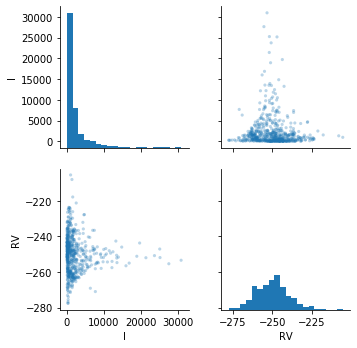

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


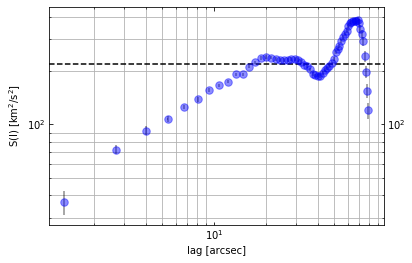

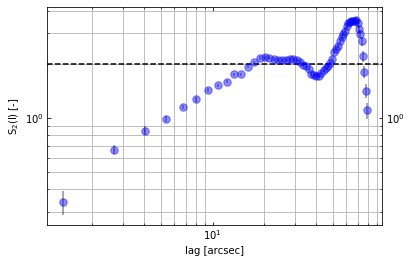

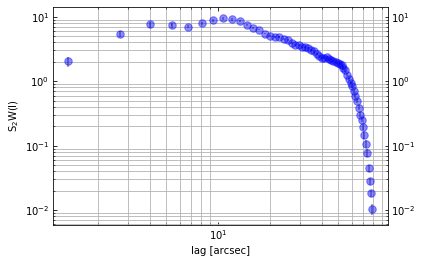

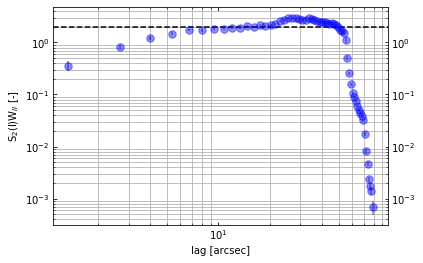

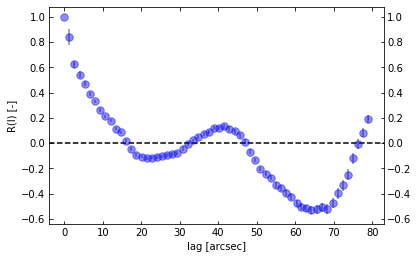

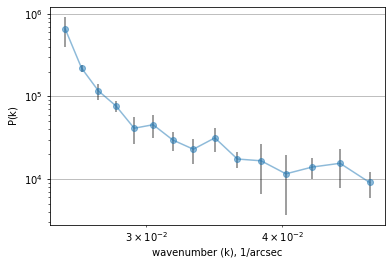

In [7]:
sfH00I=sosf(dt)
sfnH00I=sosfnorm(dt)
sfwH00I=sosfw(dt)
sfw2H00I=sosfw2(dt)
afH00I=acf(dt)
psH00I=ps(dt)

In [8]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)

           3           2
4.633e-05 x - 0.01411 x + 1.199 x - 274.2


In [9]:
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})
#dtc.describe()

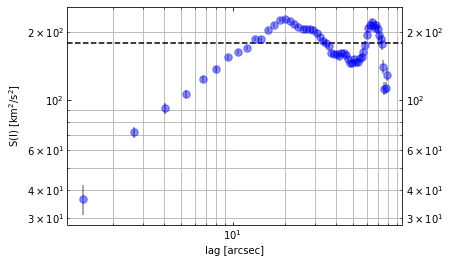

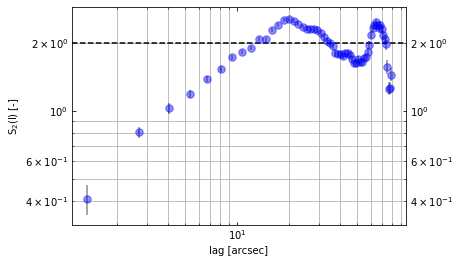

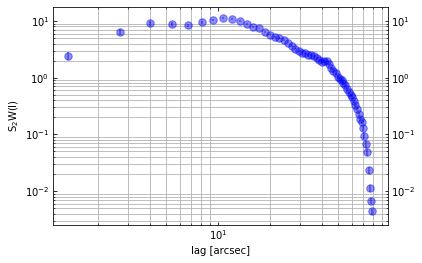

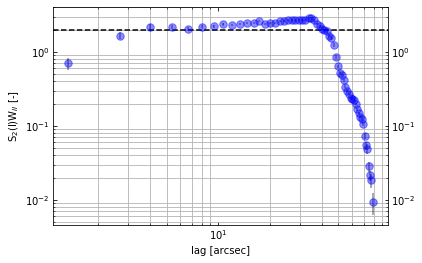

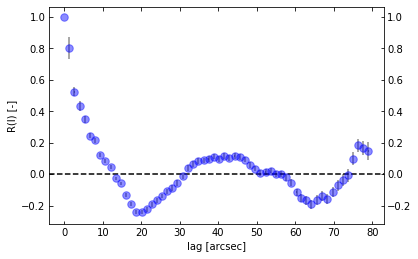

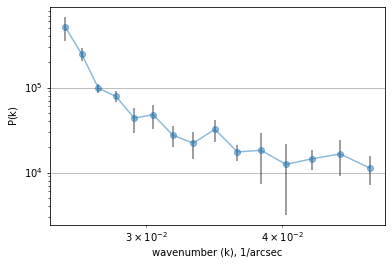

In [10]:
sfH00cI=sosf(dtc)
sfnH00cI=sosfnorm(dtc)
sfwH00cI=sosfw(dtc)
sfw2H00cI=sosfw2(dtc)
afH00cI=acf(dtc)
psH00cI=ps(dtc)

In [11]:
#II

In [12]:
mr=(dt.X<130)&(dt.X>85)
dt1=dt[mr]
#dt1.describe()

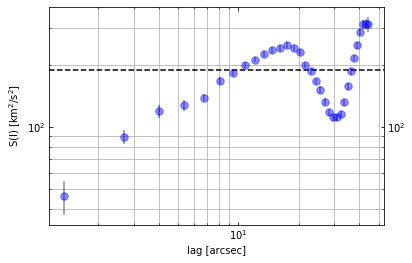

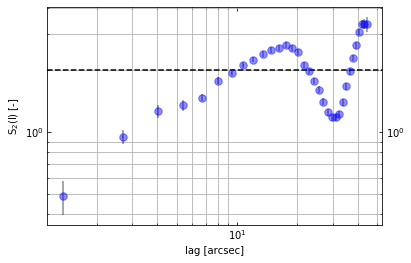

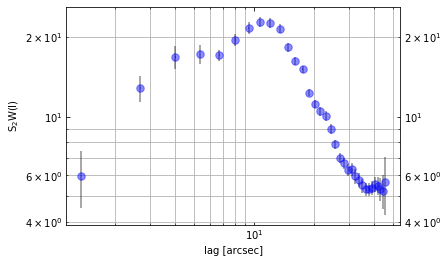

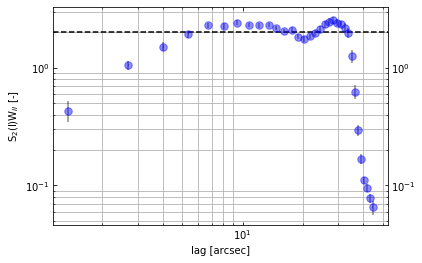

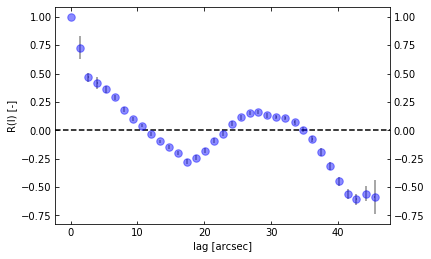

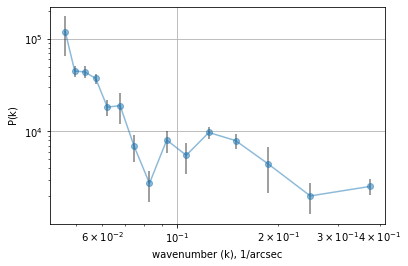

In [13]:
sfH01I=sosfs(dt1)
sfnH01I=sosfnorms(dt1)
sfwH01I=sosfw(dt1)
sfw2H01I=sosfw2(dt1)
afH01I=acf(dt1)
psH01I=ps(dt1)

In [14]:
pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)


          3          2
-0.00177 x + 0.5493 x - 56.46 x + 1674


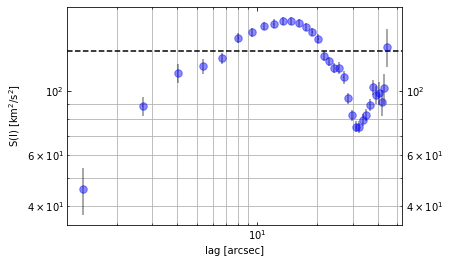

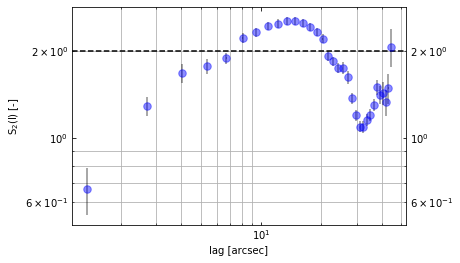

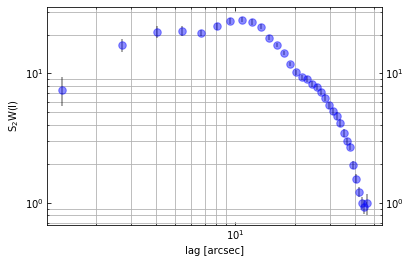

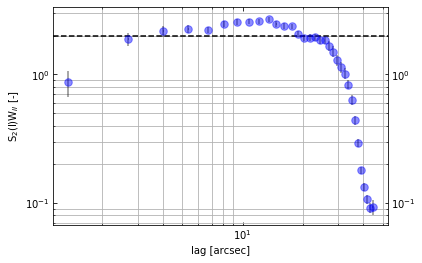

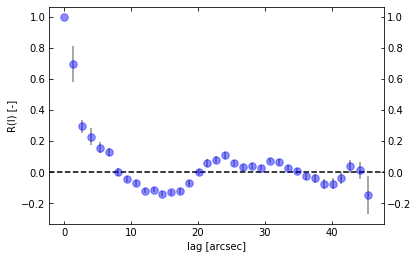

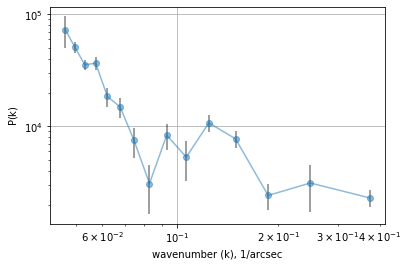

In [15]:
dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})
dtc.describe()

sfH01cI=sosfs(dtc)
sfnH01cI=sosfnorms(dtc)
sfwH01cI=sosfw(dtc)
sfw2H01cI=sosfw2(dtc)
afH01cI=acf(dtc)
psH01cI=ps(dtc)

In [16]:
#III

In [17]:
mr=(dt.X<120)&(dt.X>95)
dt2=dt[mr]
#dt2.describe()

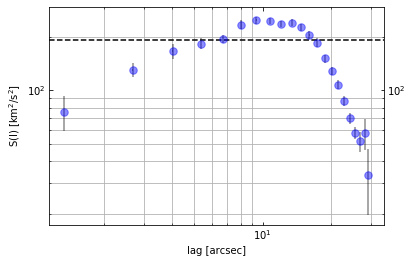

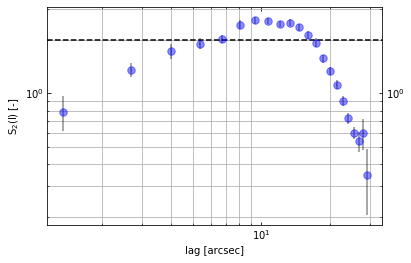

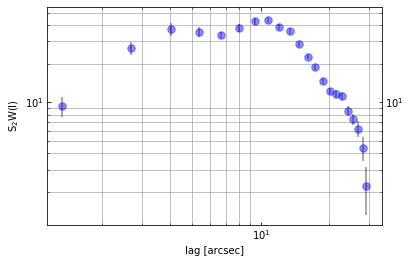

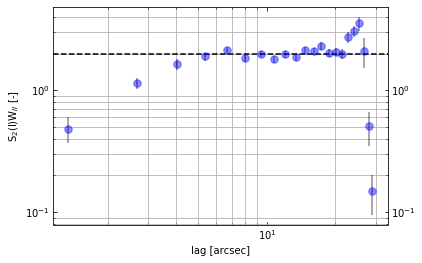

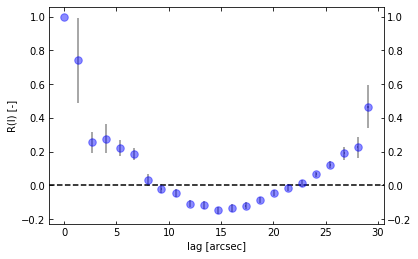

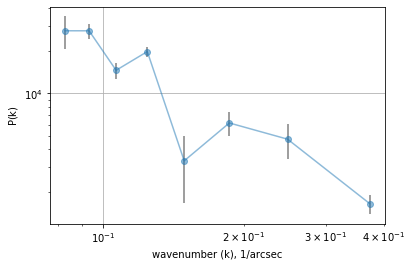

In [18]:
sfH02I=sosfs(dt2)
sfnH02I=sosfnorms(dt2)
sfwH02I=sosfw(dt2)
sfw2H02I=sosfw2(dt2)
afH02I=acf(dt2)
psH02I=ps(dt2)

In [19]:

pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)

           3         2
-0.008757 x + 2.755 x - 287.6 x + 9722


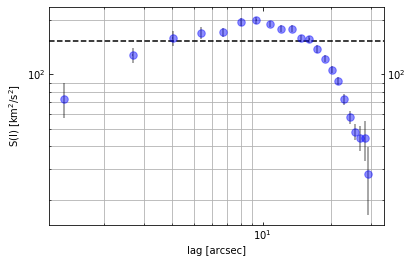

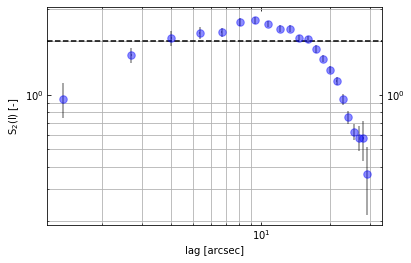

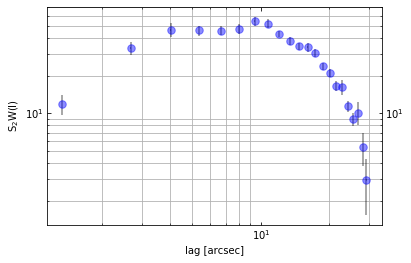

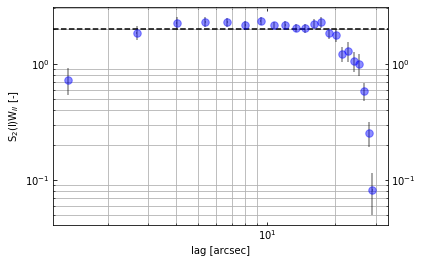

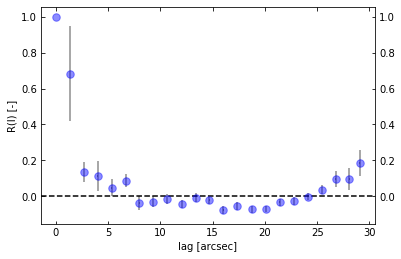

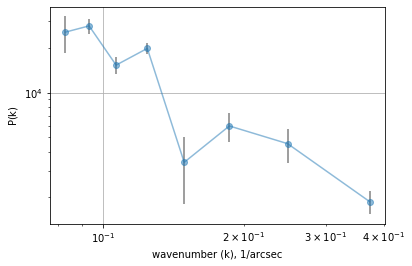

In [20]:
dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})
dtc.describe()

sfH02cI=sosfs(dtc)
sfnH02cI=sosfnorms(dtc)
sfwH02cI=sosfw(dtc)
sfw2H02cI=sosfw2(dtc)
afH02cI=acf(dtc)
psH02cI=ps(dtc)

NGC 595

In [21]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=125

In [22]:
inputfII='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputfII)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [23]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lr[Nx]))+'.csv')

In [24]:
datap='dataII6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
#dt.describe()

In [25]:
mx=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mx]

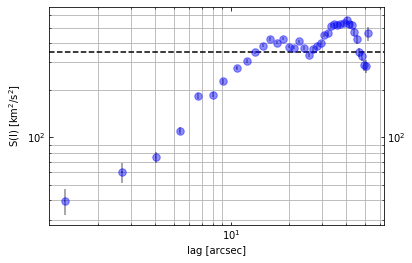

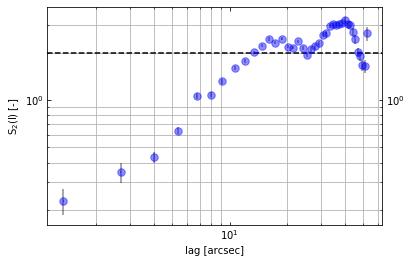

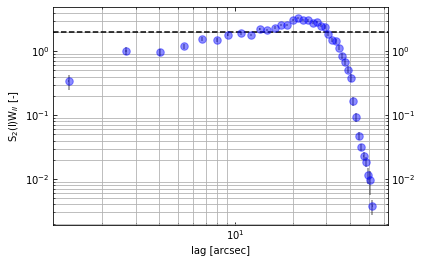

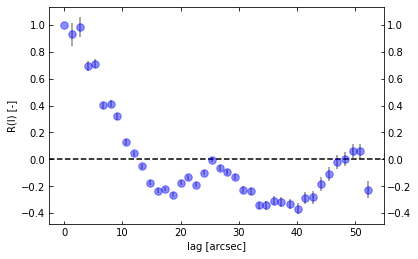

In [26]:
sfH00II=sosf(dt)
sfnH00II=sosfnorm(dt)
#sfwH00II=sosfw(dt)
sfw2H00II=sosfw2(dt)
afH00II=acf(dt)
#psH00=ps(dt)

In [27]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})

          3          2
0.000875 x - 0.2535 x + 23.91 x - 939


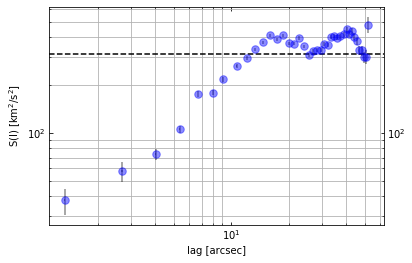

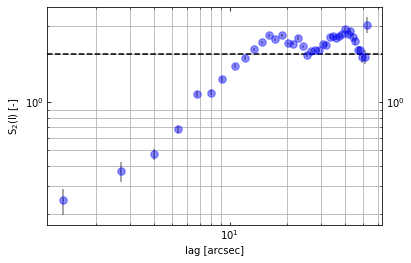

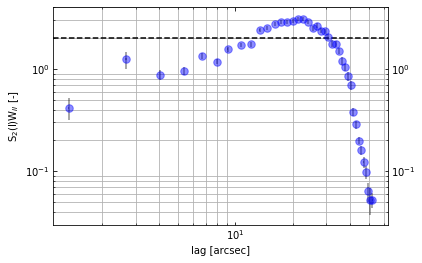

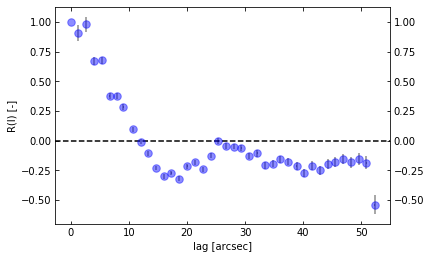

In [28]:
sfH00cII=sosf(dtc)
sfnH00cII=sosfnorm(dtc)
#sfwH00cII=sosfw(dtc)
sfw2H00cII=sosfw2(dtc)
afH00cII=acf(dtc)
#psH00cII=ps(dtc)

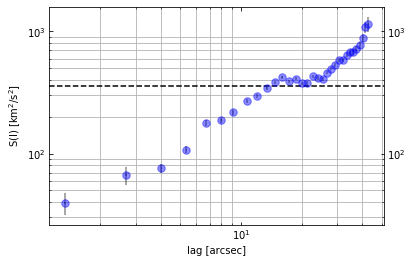

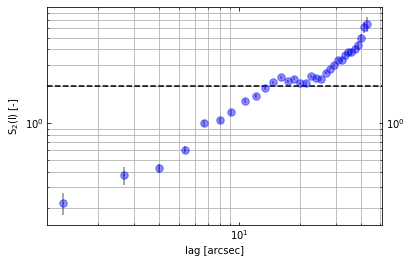

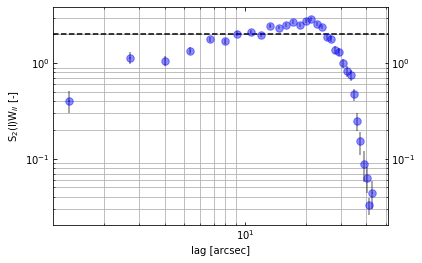

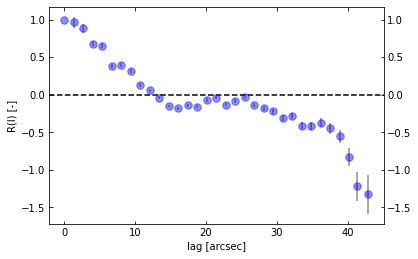

In [29]:
mr=(dt.X<120)&(dt.X>80)
dt1=dt[mr]
sfH01II=sosfs(dt1)
sfnH01II=sosfnorms(dt1)
#sfwH01II=sosfw(dt1)
sfw2H01II=sosfw2(dt1)
afH01II=acf(dt1)
#psH01=ps(dt1)

In [30]:
pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)
dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})


           3           2
-0.000338 x + 0.08886 x - 7.928 x + 35.59


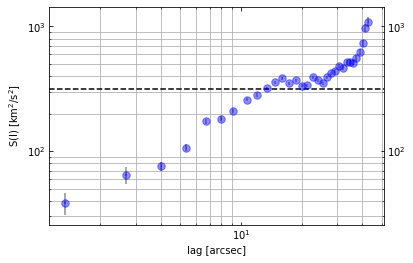

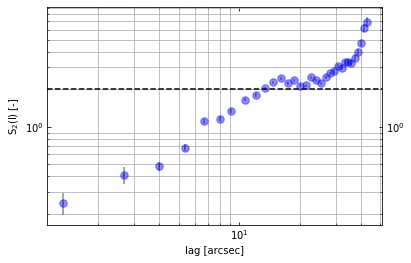

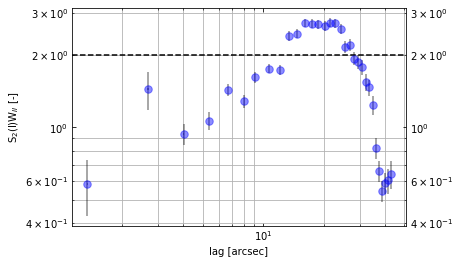

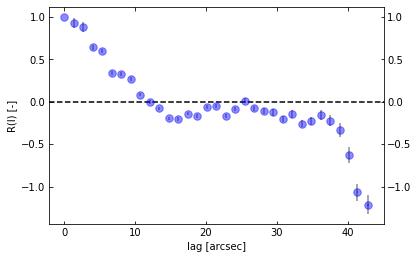

In [31]:
sfH01cII=sosfs(dtc)
sfnH01cII=sosfnorms(dtc)
#sfwH01cII=sosfw(dtc)
sfw2H01cII=sosfw2(dtc)
afH01cII=acf(dtc)
#psH01cII=ps(dtc)

In [32]:
mr=(dt.X<115)&(dt.X>91)
dt2=dt[mr]

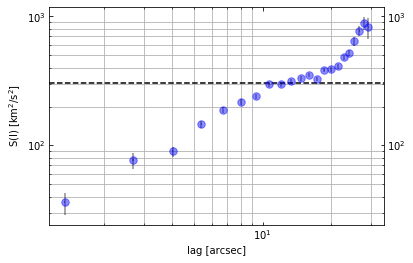

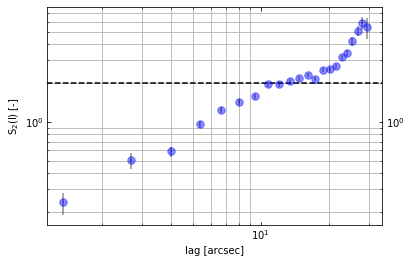

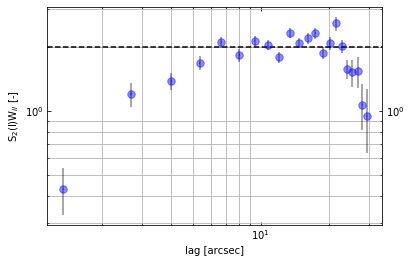

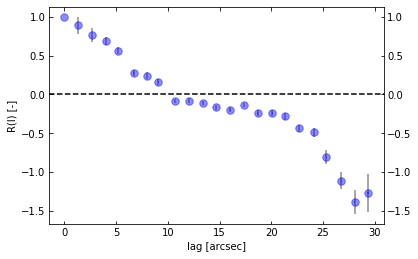

In [33]:
sfH02II=sosfs(dt2)
sfnH02II=sosfnorms(dt2)
#sfwH02II=sosfw(dt2)
sfw2H02II=sosfw2(dt2)
afH02II=acf(dt2)
#psH02II=ps(dt2)

In [34]:
pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)
dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})


         3         2
0.00448 x - 1.465 x + 158.2 x - 5856


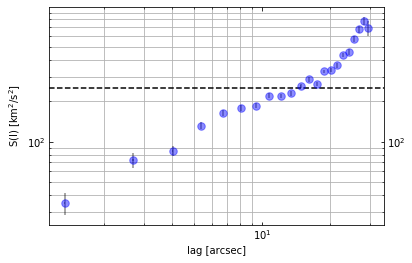

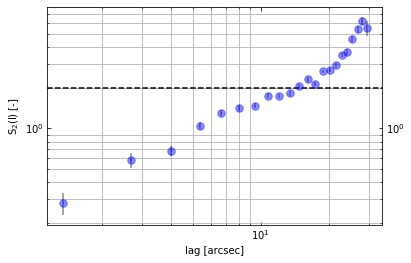

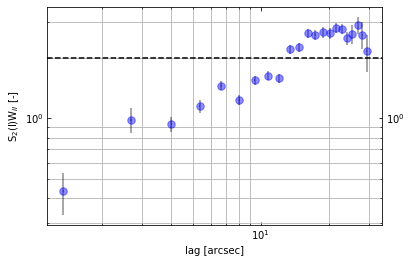

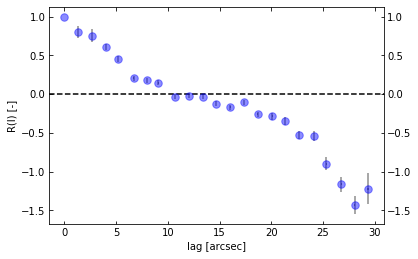

In [35]:
sfH02cII=sosfs(dtc)
sfnH02cII=sosfnorms(dtc)
#sfwH02cII=sosfw(dtc)
sfw2H02cII=sosfw2(dtc)
afH02cII=acf(dtc)
#psH02c=ps(dtc)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


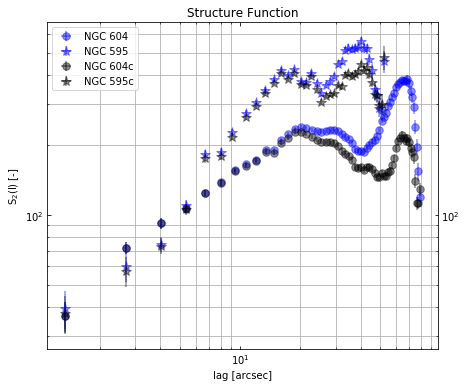

In [36]:
fig, ax=plt.subplots(figsize=(7,6))

ax.errorbar(sfH00I['Lag'],sfH00I['Nmqvd'],xerr=sfH00I.ErrX, yerr=sfH00I.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='NGC 604')
ax.errorbar(sfH00II['Lag'],sfH00II['Nmqvd'],xerr=sfH00II.ErrX, yerr=sfH00II.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='NGC 595')
ax.errorbar(sfH00cI['Lag'],sfH00cI['Nmqvd'],xerr=sfH00cI.ErrX, yerr=sfH00cI.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='NGC 604c')
ax.errorbar(sfH00cII['Lag'],sfH00cII['Nmqvd'],xerr=sfH00cII.ErrX, yerr=sfH00cII.ErrY, fmt="*",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='NGC 595c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


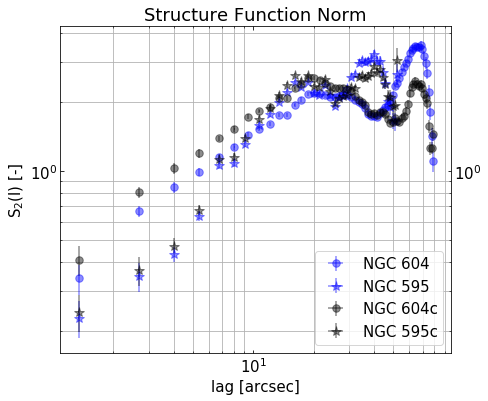

In [37]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00I['Lag'],sfnH00I['Nmqvd'],xerr=sfnH00I.ErrX, yerr=sfnH00I.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='NGC 604')
ax.errorbar(sfnH00II['Lag'],sfnH00II['Nmqvd'],xerr=sfnH00II.ErrX, yerr=sfnH00II.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='NGC 595')
ax.errorbar(sfnH00cI['Lag'],sfnH00cI['Nmqvd'],xerr=sfnH00cI.ErrX, yerr=sfnH00cI.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='NGC 604c')
ax.errorbar(sfnH00cII['Lag'],sfnH00cII['Nmqvd'],xerr=sfnH00cII.ErrX, yerr=sfnH00cII.ErrY, fmt="*",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='NGC 595c')

ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function Norm')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00I['Lag'],sfwH00I['Nmqvd'],xerr=sfwH00I.ErrX, yerr=sfwH00I.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfwH01I['Lag'],sfwH01I['Nmqvd'],xerr=sfwH01I.ErrX, yerr=sfwH01I.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfwH02I['Lag'],sfwH02I['Nmqvd'],xerr=sfwH02I.ErrX, yerr=sfwH02I.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfwH00cI['Lag'],sfwH00cI['Nmqvd'],xerr=sfwH00cI.ErrX, yerr=sfwH00cI.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfwH01cI['Lag'],sfwH01cI['Nmqvd'],xerr=sfwH01cI.ErrX, yerr=sfwH01cI.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfwH02cI['Lag'],sfwH02cI['Nmqvd'],xerr=sfwH02cI.ErrX, yerr=sfwH02cI.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W(l) [-]')
plt.title('Structure Function W')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

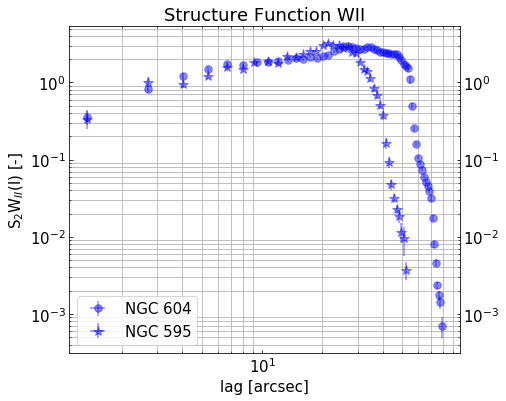

In [38]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00I['Lag'],sfw2H00I['Nmqvd'],xerr=sfw2H00I.ErrX, yerr=sfw2H00I.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='NGC 604')
ax.errorbar(sfw2H00II['Lag'],sfw2H00II['Nmqvd'],xerr=sfw2H00II.ErrX, yerr=sfw2H00II.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='NGC 595')
#ax.errorbar(sfnH00cI['Lag'],sfnH00cI['Nmqvd'],xerr=sfnH00cI.ErrX, yerr=sfnH00cI.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='NGC 604c')
#ax.errorbar(sfnH00cII['Lag'],sfnH00cII['Nmqvd'],xerr=sfnH00cII.ErrX, yerr=sfnH00cII.ErrY, fmt="*",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='NGC 595c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W$_{II}$(l) [-]')
plt.title('Structure Function WII')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"


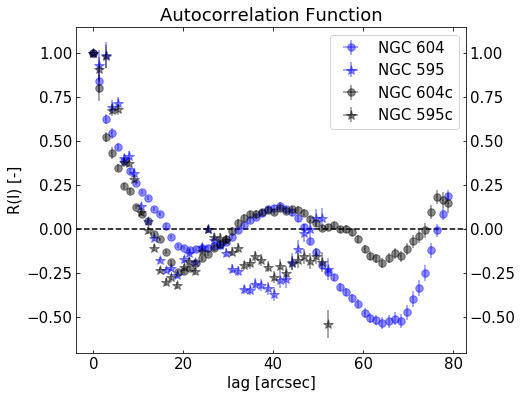

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00I['Lag'],afH00I['Nmqvd'],xerr=afH00I.ErrX, yerr=afH00I.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='NGC 604')
ax.errorbar(afH00II['Lag'],afH00II['Nmqvd'],xerr=afH00II.ErrX, yerr=afH00II.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='NGC 595')
ax.errorbar(afH00cI['Lag'],afH00cI['Nmqvd'],xerr=afH00cI.ErrX, yerr=afH00cI.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='NGC 604c')
ax.errorbar(afH00cII['Lag'],afH00cII['Nmqvd'],xerr=afH00cII.ErrX, yerr=afH00cII.ErrY, fmt="*",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='NGC 595c')
#ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"